In [1]:
import math

In [2]:
import pandas_datareader as web

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
#from sklearn import preprocessing

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
from keras.models import Sequential

In [8]:
from keras.layers import Dense, LSTM

In [9]:
import matplotlib.pyplot as plt

In [10]:
import datetime
from datetime import date

In [11]:
plt.style.use('fivethirtyeight')

In [12]:
stock = 'box'

years_of_data_to_process = 25
currentDateTime = datetime.datetime.now()
date = currentDateTime.date()
year = date.strftime("%Y")
start_year =  int(year) - years_of_data_to_process
start = datetime.datetime(start_year, 1, 1)

In [13]:
df = web.DataReader(stock, data_source='yahoo', start = start, end = date)
df.dropna(inplace= True)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-23,24.730000,20.160000,20.200001,23.230000,42593200,23.230000
2015-01-26,24.389999,22.500000,23.670000,22.600000,8677200,22.600000
2015-01-27,22.469999,21.170000,22.000000,21.299999,3272500,21.299999
2015-01-28,21.840000,19.600000,21.620001,19.780001,5047400,19.780001
2015-01-29,19.950001,18.510000,19.900000,18.799999,3419500,18.799999
...,...,...,...,...,...,...
2021-06-11,25.200001,24.905001,24.969999,25.000000,2008000,25.000000
2021-06-14,25.420000,24.879999,25.070000,25.129999,2552000,25.129999
2021-06-15,25.230000,24.945000,25.110001,25.200001,2112100,25.200001


In [14]:
df.shape

(1612, 6)

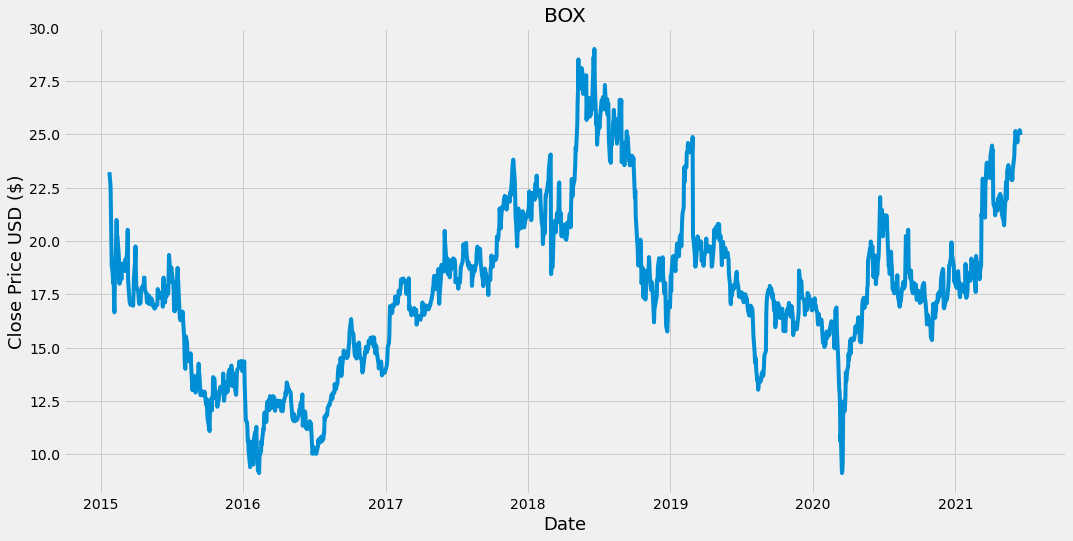

In [15]:
plt.figure(figsize=(16,8))

plt.title(stock.upper())
#plt.title( plt.title(str(stock)))
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize =18)
plt.show()

In [16]:
data =df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) *.8)
training_data_len

1290

In [17]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.70940168],
       [0.67772751],
       [0.61236798],
       ...,
       [0.80844649],
       [0.80542983],
       [0.79738559]])

In [18]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print (x_train)
        print (y_train)
        print
    

[array([0.70940168, 0.67772751, 0.61236798, 0.53594774, 0.48667668,
       0.48717946, 0.44746106, 0.45852186, 0.40120665, 0.37908496,
       0.45248873, 0.52689795, 0.59678229, 0.59527396, 0.55555556,
       0.55605833, 0.49924581, 0.4464555 , 0.49472092, 0.48919056,
       0.45701353, 0.48818501, 0.48014078, 0.49371546, 0.479638  ,
       0.486174  , 0.47611866, 0.49673202, 0.50377071, 0.49220713,
       0.51684261, 0.52890897, 0.57365513, 0.45651085, 0.44042228,
       0.40271489, 0.40221221, 0.39668176, 0.39919555, 0.40673701,
       0.40170943, 0.39617898, 0.39467065, 0.42332835, 0.46153842,
       0.49924581, 0.53443941, 0.47913522, 0.44142783, 0.42936148,
       0.42684769, 0.41427856, 0.40120665, 0.39869277, 0.40120665,
       0.4223228 , 0.43086981, 0.43740571, 0.43589748, 0.44293616])]
[0.44243338556246425]


In [19]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1230, 60, 1)

In [21]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
    

In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1230/1230 [==============================] - 27s 11ms/step - loss: 0.0096


In [24]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test =  dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [25]:
x_test = np.array(x_test)

In [26]:
x_test =  np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [27]:
predictions = model.predict(x_test)
predictions =  scaler.inverse_transform(predictions)

In [28]:
rmse = np.sqrt(np.mean(predictions -y_test) **2)
rmse

0.5188995444256327

<ipython-input-29-6e6dce25b9c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

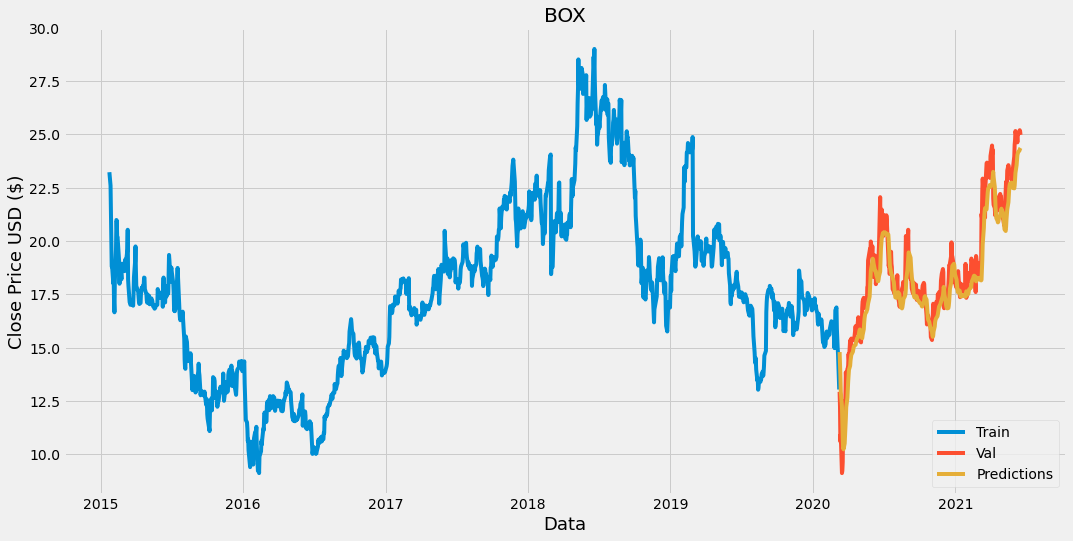

In [29]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title(stock.upper())
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot()
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show

In [30]:
print(valid)

                Close  Predictions
Date                              
2020-03-10  12.930000    14.794767
2020-03-11  12.230000    14.254720
2020-03-12  10.600000    13.668047
2020-03-13  10.930000    12.923015
2020-03-16   9.120000    12.258574
...               ...          ...
2021-06-11  25.000000    24.182806
2021-06-14  25.129999    24.232353
2021-06-15  25.200001    24.282913
2021-06-16  25.139999    24.334892
2021-06-17  24.980000    24.366560

[322 rows x 2 columns]


In [31]:
apple_quote = web.DataReader(stock, data_source =  'yahoo', start = start , end = date)
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[24.35524]]


In [32]:
#apple_quote2 = web.DataReader(stock, data_source =  'yahoo', start = date , end = date)
#print (apple_quote2['Close'])